# Telecom X - Parte 2: Prevendo Churn

🎯 **Missão**

Sua nova missão é desenvolver **modelos preditivos** capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

🧠 **Objetivos do Desafio**

  - Preparar os dados para a modelagem (tratamento, encoding, normalização).
  - Realizar análise de correlação e seleção de variáveis.
  - Treinar dois ou mais modelos de classificação.
  - Avaliar o desempenho dos modelos com métricas.
  -Interpretar os resultados, incluindo a importância das variáveis.
  - Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.


## Preparação dos dados

### Extração do arquivo tratado

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/dados_tratados.csv')

In [3]:
df.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Charges.Daily
0,0.0,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,0.0,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,1.0,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,1.0,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,1.0,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


## Remoção de Colunas Irrelevantes

In [4]:
print("Número de valores únicos por coluna:")

for column in df.columns:
    print(f"- {column}: {df[column].nunique()}")

Número de valores únicos por coluna:
- Churn: 2
- gender: 2
- SeniorCitizen: 2
- Partner: 2
- Dependents: 2
- tenure: 73
- PhoneService: 2
- MultipleLines: 3
- InternetService: 3
- OnlineSecurity: 3
- OnlineBackup: 3
- DeviceProtection: 3
- TechSupport: 3
- StreamingTV: 3
- StreamingMovies: 3
- Contract: 3
- PaperlessBilling: 2
- PaymentMethod: 4
- Charges.Monthly: 1585
- Charges.Total: 6531
- Charges.Daily: 1585


In [5]:
colunas_para_remover = [col for col in df.columns if df[col].nunique() == 1]

if not colunas_para_remover:
    print("\nNenhuma coluna com apenas um valor único encontrada.")
else:
    print(f"\nColunas a serem removidas (apenas um valor único): {colunas_para_remover}")


Nenhuma coluna com apenas um valor único encontrada.


In [6]:
colunas_com_identificador = [col for col in df.columns if df[col].nunique() == len(df)]

if not colunas_com_identificador:
    print("\nNenhuma coluna identificadora (todos os valores únicos) encontrada.")
else:
    print(f"\nColunas identificadoras a serem removidas: {colunas_com_identificador}")


Nenhuma coluna identificadora (todos os valores únicos) encontrada.


Após a análise, verificou-se que todas as colunas no conjunto de dados `dados_tratados.csv` parecem ser relevantes para a análise de churn e para o modelo preditivo. Não há colunas de identificador exclusivas (como um ID de cliente) ou colunas com um único valor que devam ser removidas.

## Encoding

Os algoritmos de Machine Learning não conseguem compreender informações que não estejam em formato numérico. Portanto, se for o desejo de utilizar variáveis categóricas em modelos, é necessário que elas passem por algum tipo de tratamento para que fiquem em formato numérico.

### Identificando variáveis categóricas

In [7]:
colunas_categoricas = df.select_dtypes(include=['object', 'bool']).columns
colunas_categoricas

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [8]:
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns
colunas_numericas

Index(['Churn', 'tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily'], dtype='object')

### Utilizando o método `get_dummies`


In [9]:
# aplicando o one-hot encoding nas colunas categóricas
df_encoded = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True, dtype=int)
df_encoded

,Churn,tenure,Charges.Monthly,Charges.Total,Charges.Daily,gender_Male,SeniorCitizen_True,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,9,65.60,593.30,2.186667,0,0,1,1,1,...,0,1,0,0,1,0,1,0,0,1
1,0.0,9,59.90,542.40,1.996667,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
2,1.0,4,73.90,280.85,2.463333,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
3,1.0,13,98.00,1237.85,3.266667,1,1,1,0,1,...,0,1,0,1,0,0,1,0,1,0
4,1.0,3,83.90,267.40,2.796667,0,1,1,0,1,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,13,55.15,742.90,1.838333,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
7039,1.0,22,85.10,1873.70,2.836667,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
7040,0.0,2,50.30,92.75,1.676667,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
7041,0.0,67,67.85,4627.65,2.261667,1,0,1,1,1,...,0,0,0,1,0,1,0,0,0,1


## Verificação da Proporção de Evasão

In [10]:
# Contagem dos valores churn
churn_cont = df['Churn'].value_counts()

# Proporcão dos valores churn
churn_prop = df['Churn'].value_counts(normalize=True) * 100

# Resultados
resultados = {
    "Status": ["Ativos (Churn = 0)", "Evadiram (Churn = 1)"],
    "Quantidade": [churn_cont[0], churn_cont[1]],
    "Proporção (%)": [f"{churn_prop[0]:.2f}%", f"{churn_prop[1]:.2f}%"]
}

results_df = pd.DataFrame(resultados)

print("Proporção de Clientes Ativos vs. Clientes que Evadiram:")
print(results_df.to_string(index=False))

Proporção de Clientes Ativos vs. Clientes que Evadiram:
              Status  Quantidade Proporção (%)
  Ativos (Churn = 0)        5174        73.46%
Evadiram (Churn = 1)        1869        26.54%


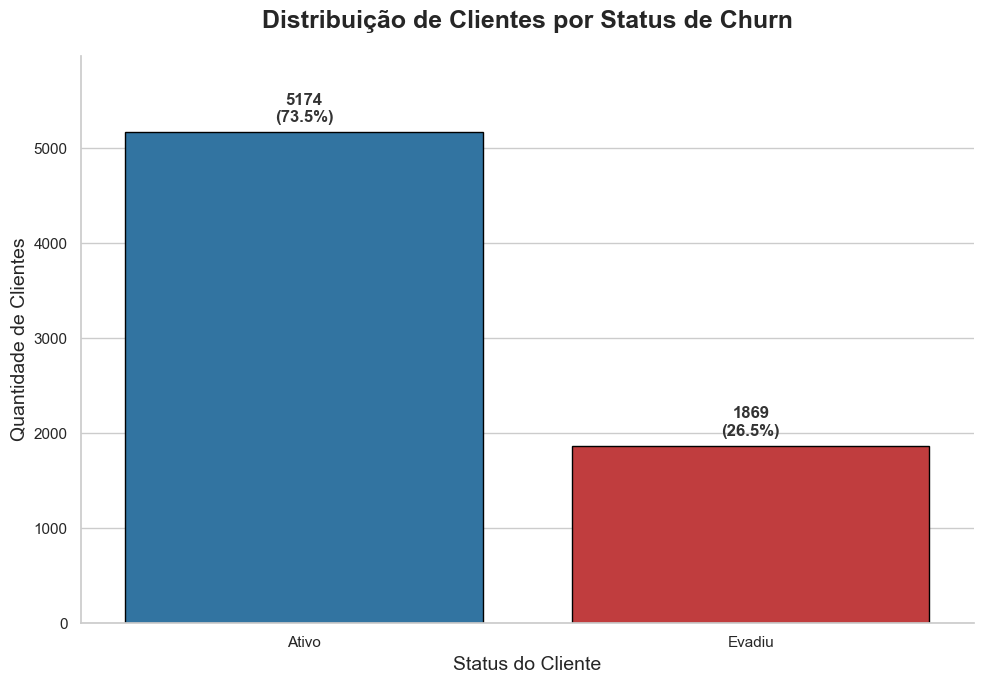

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

mapeamento = {0: 'Ativo', 1: 'Evadiu'}
df['Churn_Label'] = df['Churn'].map(mapeamento)

sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 7))

palette = {'Ativo': '#1f77b4', 'Evadiu': '#d62728'}
sns.countplot(
    data=df,
    x='Churn_Label',
    ax=ax,
    palette=palette,
    order=['Ativo', 'Evadiu'],
    edgecolor='black',
    linewidth=1,
    legend=False,
    hue='Churn_Label'
)

total = len(df)
for p in ax.patches:
    count = int(p.get_height())
    percentage = f'{(count / total) * 100:.1f}%'
    ax.annotate(
        f'{count}\n({percentage})',
        (p.get_x() + p.get_width() / 2., count),
        ha='center', va='bottom',
        xytext=(0, 5),
        textcoords='offset points',
        fontsize=12,
        fontweight='bold',
        color='#333'
    )

ax.set_title('Distribuição de Clientes por Status de Churn', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Status do Cliente', fontsize=14)
ax.set_ylabel('Quantidade de Clientes', fontsize=14)
ax.set_ylim(0, ax.get_ylim()[1] * 1.1)

sns.despine(ax=ax)
plt.tight_layout()
plt.savefig('./figures/distribuicao_clintes_status_churn.png')
plt.show()

## Correlação e Seleção de Variáveis

### Análise de Correlação - Matriz de Correlação entre variáveis numéricas

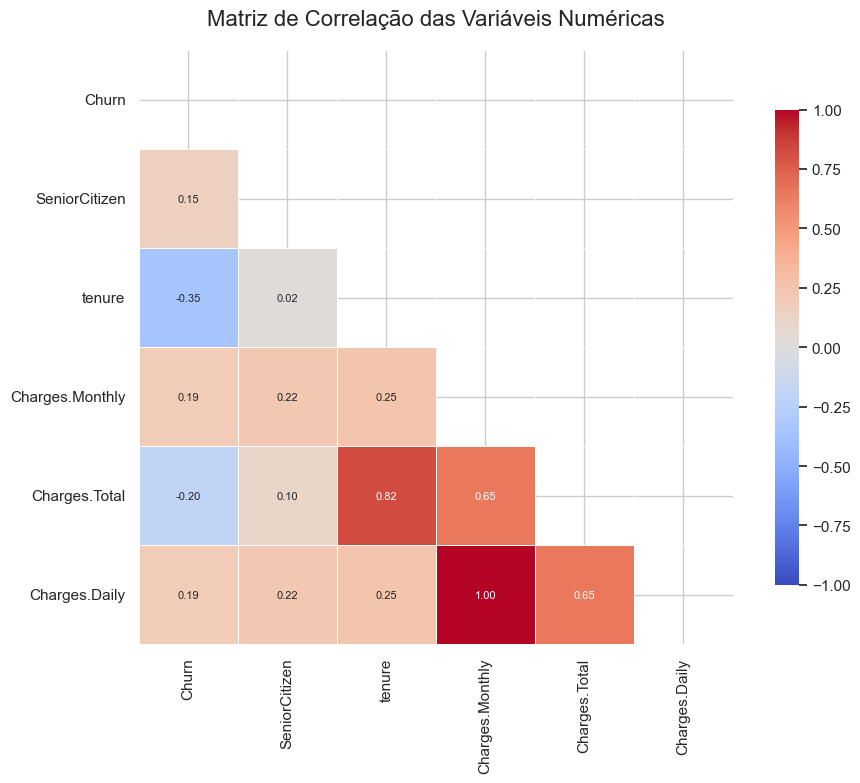

In [12]:
import numpy as np

# Selecionando apenas as colunas numéricas
dados_numericos = df.select_dtypes(include=['int64', 'float64', 'bool'])


# Calculando a matriz de correlação
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correlação com um heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(matriz_correlacao,
            annot=True,
            cmap='coolwarm',
            fmt=".2f",
            linewidths=.5,
            annot_kws={"size": 8},
            cbar_kws={"shrink": .8},
            vmin=-1,
            vmax=1,
            mask=np.triu(matriz_correlacao),
            square=True)

plt.title('Matriz de Correlação das Variáveis Numéricas', fontsize=16, pad=18)
plt.tight_layout()
plt.savefig('./figures/matriz_correlacao_heatmap.png')
plt.show()

Focando especificamente na nossa variável alvo, Churn, podemos extrair e ordenar as correlações para ver quais fatores têm mais impacto. Abaixo está a lista das variáveis, da mais correlacionada (positivamente) à menos correlacionada (negativamente) com o Churn:

  - **Charges.Monthly** - `0.19` - **Positiva Moderada:** Clientes com cobranças mensais mais altas cancelam mais.
  - **SeniorCitizen **- `0.15` - **Positiva Leve:** Clientes idosos têm uma leve tendência a cancelar mais.
  - **Tenure** - `-0.35` - **Negativa Forte:** Quanto maior o tempo de permanência do cliente (tenure), menor a chance de ele cancelar
  - **Charges.Total** - `-0.20` - **Negativa Moderada**: Clientes com contrato de 2 anos têm baixa propensão a cancelar


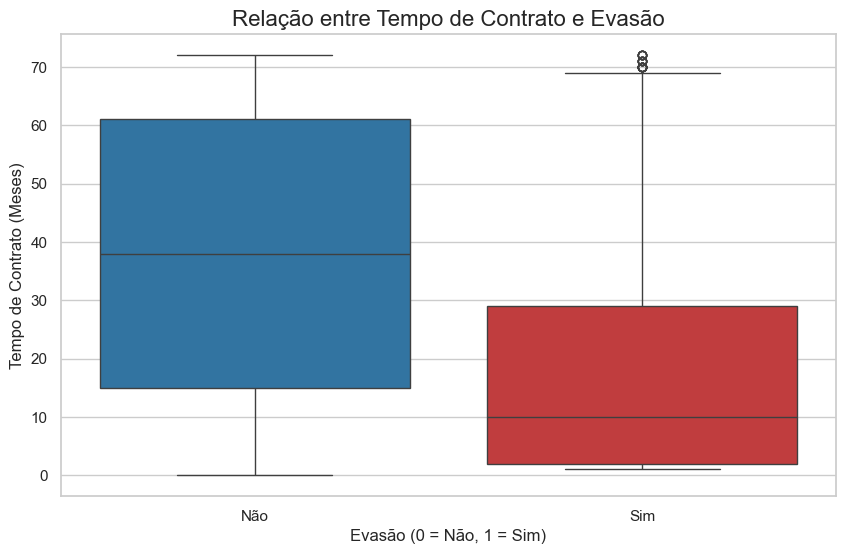

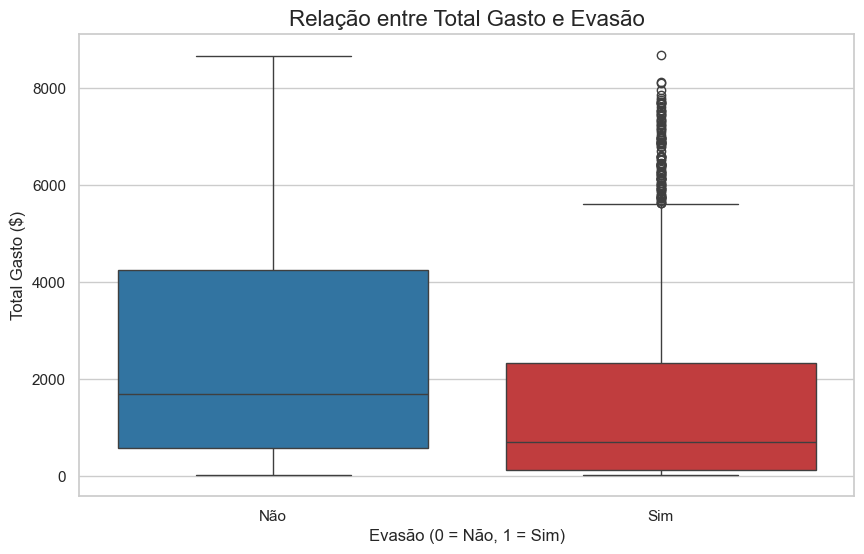

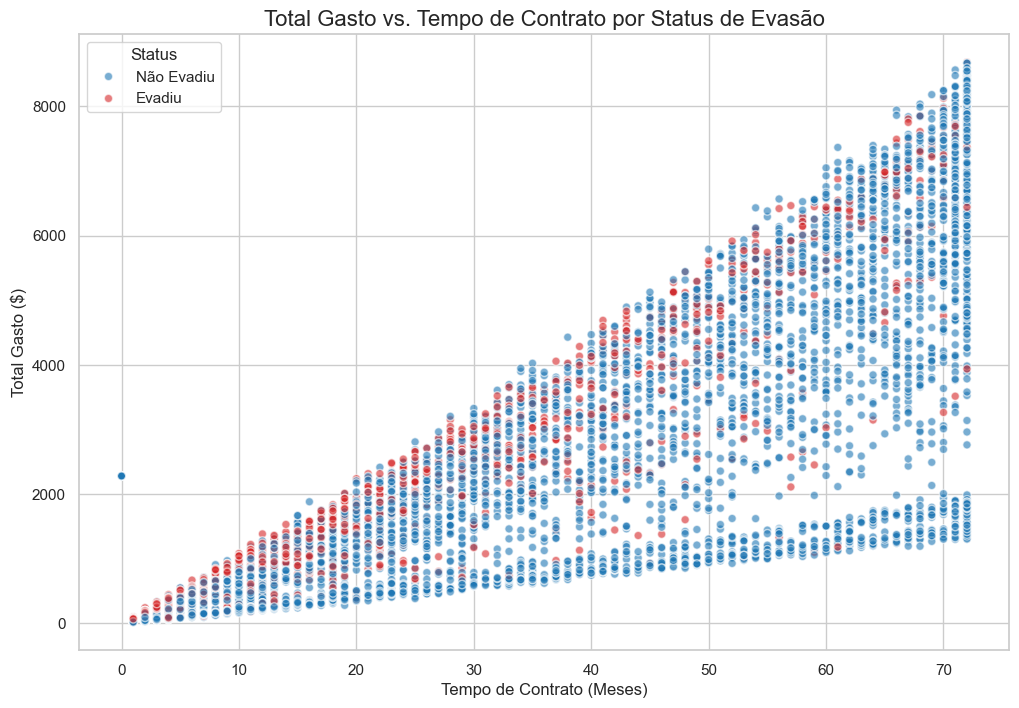

In [13]:
# Configurar o estilo dos gráficos
sns.set(style="whitegrid")

palette = {'Ativo': '#1f77b4', 'Evadiu': '#d62728'}

# --- Gráfico 1: Boxplot de Tempo de Contrato (tenure) vs. Evasão (Churn) ---
plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.boxplot(x='Churn',
            y='tenure',
            ax=ax,
            palette=palette,
            linewidth=1,
            legend=False,
            hue='Churn_Label',
            data=df)

plt.title('Relação entre Tempo de Contrato e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Tempo de Contrato (Meses)', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('./figures/tenure_vs_churn_boxplot.png')
plt.show()

# --- Gráfico 2: Boxplot do Total Gasto (Charges.Total) vs. Evasão (Churn) ---
plt.figure(figsize=(10, 6))
ax = plt.gca()
sns.boxplot(x='Churn',
            y='Charges.Total',
            ax=ax,
            palette=palette,
            linewidth=1,
            legend=False,
            hue='Churn_Label',
            data=df)

plt.title('Relação entre Total Gasto e Evasão', fontsize=16)
plt.xlabel('Evasão (0 = Não, 1 = Sim)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.savefig('./figures/total_charges_vs_churn_boxplot.png')
plt.show()

# --- Gráfico 3 (Bônus): Scatter plot do Total Gasto vs. Tempo de Contrato, colorido pela Evasão ---

cores = {'Ativo': '#1f77b4', 'Evadiu': '#d62728'}

plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(x='tenure',
                               y='Charges.Total',
                               hue='Churn_Label',
                               palette=cores,
                               legend='full',
                               linewidth=1,
                               data=df,
                               alpha=0.6)
plt.title('Total Gasto vs. Tempo de Contrato por Status de Evasão', fontsize=16)
plt.xlabel('Tempo de Contrato (Meses)', fontsize=12)
plt.ylabel('Total Gasto ($)', fontsize=12)
handles, labels  =  scatter_plot.get_legend_handles_labels()
scatter_plot.legend(handles, ['Não Evadiu', 'Evadiu'], title='Status')
plt.savefig('./figures/scatter_tenure_charges_churn.png')
plt.show()

### Análises Direcionadas

### Tempo de contrato × Evasão e Total Gasto × Evasão

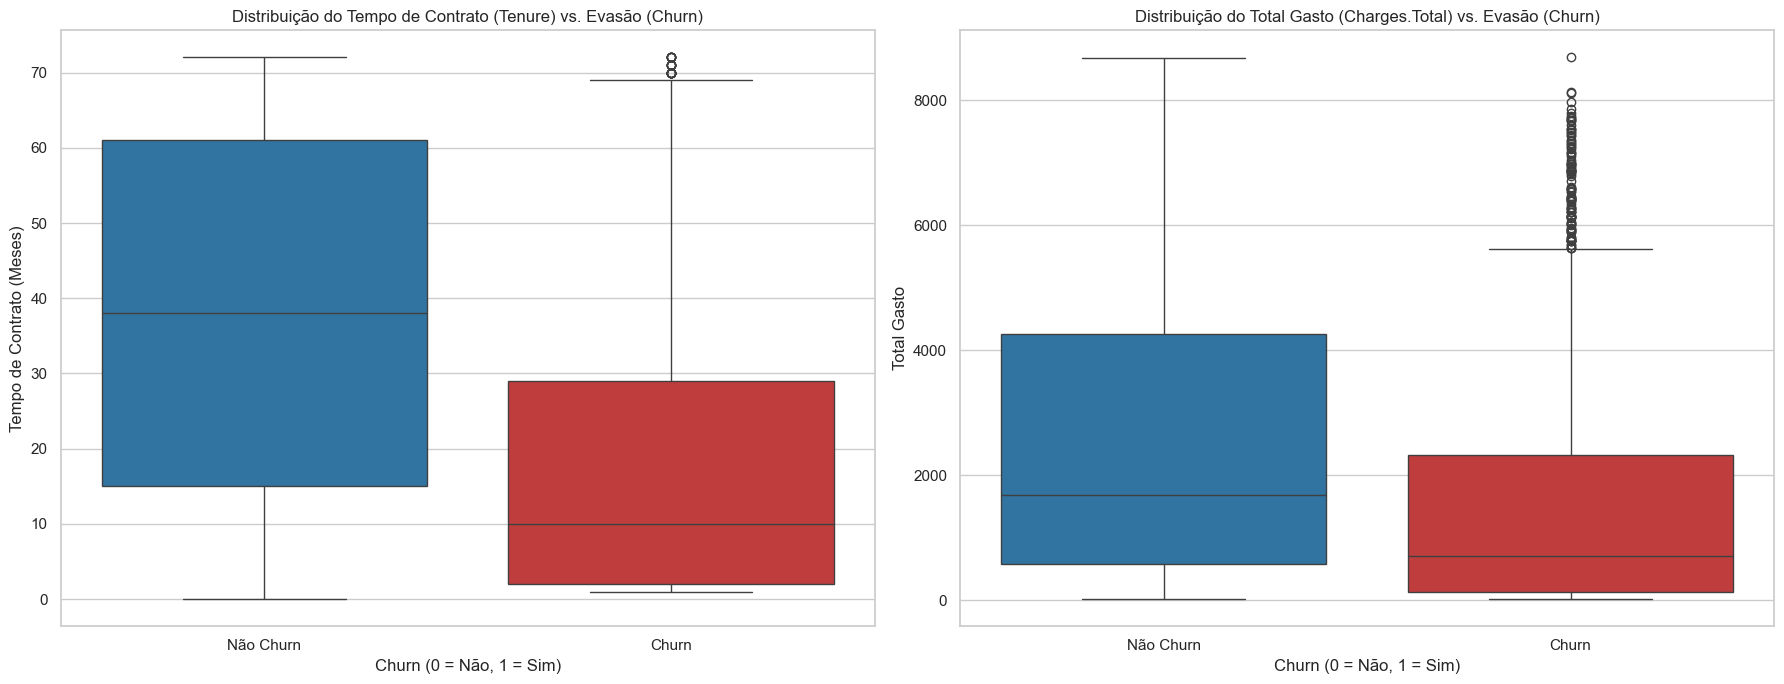

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

cores = {'Ativo': '#1f77b4', 'Evadiu': '#d62728'}

# Plot 1: Boxplot for Tenure vs. Churn
sns.boxplot(x='Churn',
            y='tenure',
            palette=cores,
            hue='Churn_Label',
            linewidth=1,
            legend=False,
            ax=axes[0],
            data=df)

axes[0].set_title('Distribuição do Tempo de Contrato (Tenure) vs. Evasão (Churn)')
axes[0].set_xlabel('Churn (0 = Não, 1 = Sim)')
axes[0].set_ylabel('Tempo de Contrato (Meses)')
axes[0].set_xticks([0, 1])
axes[0].set_xticklabels(['Não Churn', 'Churn'])


# Plot 2: Boxplot for Total Charges vs. Churn
sns.boxplot(x='Churn',
            y='Charges.Total',
            palette=cores,
            hue='Churn_Label',
            linewidth=1,
            legend=False,
            ax=axes[1],
            data=df)

axes[1].set_title('Distribuição do Total Gasto (Charges.Total) vs. Evasão (Churn)')
axes[1].set_xlabel('Churn (0 = Não, 1 = Sim)')
axes[1].set_ylabel('Total Gasto')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(['Não Churn', 'Churn'])

plt.tight_layout()
fig.savefig('./figures/churn_vs_tenure_total.png')
plt.show()

## Modelagem Preditiva

### Separação de dados

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [18]:
print("Proporção de Churn no conjunto de treino:")
print(y_train.value_counts(normalize=True))
print("\nProporção de Churn no conjunto de teste:")
print(y_test.value_counts(normalize=True))

Proporção de Churn no conjunto de treino:
Churn
0.0    0.734686
1.0    0.265314
Name: proportion, dtype: float64

Proporção de Churn no conjunto de teste:
Churn
0.0    0.734501
1.0    0.265499
Name: proportion, dtype: float64


### Balanceamento

In [19]:
from imblearn.over_sampling import SMOTE

In [20]:
smote = SMOTE()
X_balanceado, y_balanceado = smote.fit_resample(X_train, y_train)

In [21]:
y_balanceado.value_counts(normalize=True)

Churn
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64

### Normalização

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Criando o dataset normalizado
X_train_norm = scaler.fit_transform(X_balanceado)
X_test_norm = scaler.transform(X_test)

## Criação de modelos

### Modelo Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

# Contruindo o modelo
modelo_rf = RandomForestClassifier(random_state=42, class_weight='balanced')
modelo_rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [24]:
# Fazer a previsão do modelo
y_pred_rf = modelo_rf.predict(X_test)


Resultados do Random Forest: 
              precision    recall  f1-score   support

   Não Churn       0.82      0.90      0.86      1552
       Churn       0.63      0.47      0.54       561

    accuracy                           0.79      2113
   macro avg       0.73      0.68      0.70      2113
weighted avg       0.77      0.79      0.77      2113


AUC: 0.6847142207398424

Matriz de Confusão: 


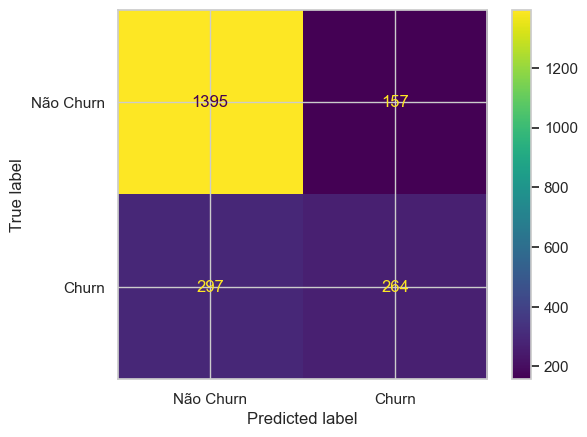

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, classification_report

print("\nResultados do Random Forest: ")
report_rf = classification_report(y_test, y_pred_rf, target_names=['Não Churn', 'Churn'])
print(report_rf)
print(f"\nAUC: {roc_auc_score(y_test, y_pred_rf)}")
print("\nMatriz de Confusão: ")
cm_rf = ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, display_labels=['Não Churn', 'Churn'])

### Regressão Logística

In [26]:
from sklearn.linear_model import LogisticRegression

modelo_log = LogisticRegression(max_iter=10000, random_state=42, class_weight='balanced')
modelo_log.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42)

In [27]:
# Fazer a previsão no conjunto de teste
y_pred_lr = modelo_log.predict(X_test)


Resultados da Regressão Logística:
              precision    recall  f1-score   support

   Não Churn       0.91      0.71      0.80      1552
       Churn       0.50      0.80      0.62       561

    accuracy                           0.73      2113
   macro avg       0.70      0.76      0.71      2113
weighted avg       0.80      0.73      0.75      2113



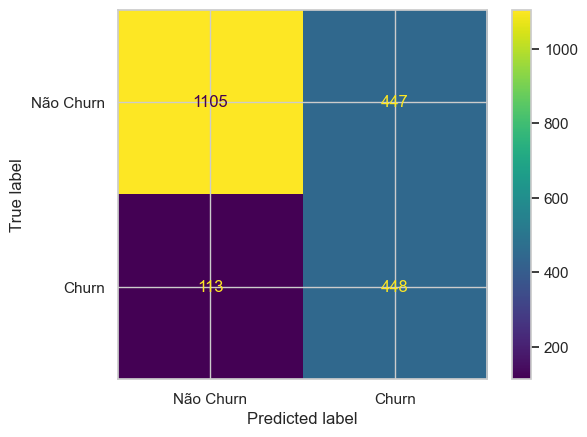

In [28]:
# 6. Avaliar o modelo
print("\nResultados da Regressão Logística:")
report_lr = classification_report(y_test, y_pred_lr, target_names=['Não Churn', 'Churn'])
print(report_lr)
cm_lr = ConfusionMatrixDisplay.from_estimator(modelo_log, X_test, y_test, display_labels=['Não Churn', 'Churn'])

### Avaliação dos Modelos

A análise abaixo compara **Regressão Logística** e **Random Forest** no conjunto de teste, utilizando métricas-chave para problemas de classificação binária em dados desbalanceados.

---

#### Modelo 1 – Regressão Logística  
Treinado com **ponderação de classes** para lidar com desbalanceamento.

#### Métricas de Desempenho
| Métrica     | Não Churn (Classe 0) | Churn (Classe 1) | Média Ponderada |
|-------------|----------------------|------------------|-----------------|
| Precisão    | 0.91                 | 0.50             | 0.80            |
| Recall      | 0.71                 | 0.80             | 0.73            |
| F1-Score    | 0.80                 | 0.61             | 0.75            |
| **Acurácia**| -                    | -                | **73%**         |

### Matriz de Confusão
|               | Previsto: Não Churn | Previsto: Churn |
|---------------|---------------------|-----------------|
| **Verdadeiro: Não Churn** | 1111 (VN) | 441 (FP) |
| **Verdadeiro: Churn**     | 112 (FN) | 449 (VP) |

#### Análise
- **Acurácia:** 73%  
- **Precisão (Churn):** 50% → Apenas metade dos alertas de churn são corretos.  
- **Recall (Churn):** 80% → Força do modelo; encontra 8 em cada 10 churners reais.  
- **F1-Score (Churn):** 0.61 → Bom equilíbrio para o foco em churn.  
- **Interpretação:** Priorização de recall → mais falsos positivos (441), mas menos churners perdidos.

---

### Modelo 2 – Random Forest  
Treinado com **ponderação de classes** para lidar com desbalanceamento.

#### Métricas de Desempenho
| Métrica     | Não Churn (Classe 0) | Churn (Classe 1) | Média Ponderada |
|-------------|----------------------|------------------|-----------------|
| Precisão    | 0.82                 | 0.63             | 0.77            |
| Recall      | 0.90                 | 0.47             | 0.79            |
| F1-Score    | 0.86                 | 0.54             | 0.77            |
| **Acurácia**| -                    | -                | **79%**         |

#### Matriz de Confusão
|               | Previsto: Não Churn | Previsto: Churn |
|---------------|---------------------|-----------------|
| **Verdadeiro: Não Churn** | 1398 (VN) | 154 (FP) |
| **Verdadeiro: Churn**     | 297 (FN) | 264 (VP) |

### Análise
- **Acurácia:** 79% → Melhor que a regressão logística em acerto geral.  
- **Precisão (Churn):** 63% → Mais confiável nos alertas emitidos.  
- **Recall (Churn):** 47% → Ponto fraco; perde mais da metade dos churners reais.  
- **F1-Score (Churn):** 0.54 → Menor equilíbrio entre precisão e recall.  
- **Interpretação:** Mais conservador → poucos falsos positivos (154), mas mais falsos negativos (297).

---

### Conclusão Comparativa

| Modelo               | Pró (Foco em Churn)                                | Contra (Foco em Churn)                      | Ideal Para |
|----------------------|----------------------------------------------------|----------------------------------------------|------------|
| **Regressão Logística** | Recall alto (80%) – encontra a maioria dos churners | Precisão moderada (50%) – mais falsos alarmes | Campanhas de retenção em massa |
| **Random Forest**    | Precisão boa (63%) – alertas mais confiáveis        | Recall baixo (47%) – perde muitos churners   | Campanhas de alto custo, foco em certeza |

---

**Recomendação:**  
Para o objetivo estratégico da **Telecom X** de reduzir a evasão de forma proativa, a **Regressão Logística** é a escolha mais adequada. Sua capacidade de identificar **8 em cada 10 clientes que iriam cancelar** aumenta significativamente a oportunidade de retenção de receita.


 ### Análise Crítica dos Modelos

#### Qual modelo teve o melhor desempenho?

Para definir o "melhor" desempenho, devemos alinhar com o objetivo principal:  
Identificar o maior número possível de clientes prestes a cancelar o serviço, para agir e retê-los.

A métrica mais importante para isso é o **Recall da classe "Churn"**, que indica a porcentagem de clientes que realmente cancelaram e foram corretamente identificados pelo modelo.

- Recall – Regressão Logística: 80%  
- Recall – Random Forest: 47%  

Conclusão: O modelo **Regressão Logística** apresentou desempenho muito superior para o objetivo de negócio.

Embora o Random Forest tenha maior acurácia geral (79% vs 73%), isso se deve à sua eficiência em identificar clientes que **não** vão cancelar — o que não resolve o problema de evasão.  
A Regressão Logística, ao encontrar 8 em cada 10 churners, fornece uma ferramenta de negócios mais poderosa e impactante.

---

#### Análise de Overfitting e Underfitting

##### Random Forest
**Diagnóstico:**  
- Desempenho no teste para recall (47%) foi baixo para a classe minoritária.  
- Não é um caso clássico de overfitting, mas sim falta de generalização para identificar churners.  
- Aprendeu muito bem a classe majoritária (não churn), mas falhou no objetivo principal.

**Causas prováveis:**  
- Parâmetros padrão podem ter gerado árvores muito complexas.  
- Ponderação de classes não foi suficiente para equilibrar a predição.

**Próximos passos:**  
- Realizar otimização de hiperparâmetros (ex.: GridSearchCV).  
- Testar ajustes como:
  - `max_depth` (profundidade máxima das árvores)  
  - `n_estimators` (número de árvores)  
  - `min_samples_leaf` (mínimo de amostras por folha)  
- Objetivo: maximizar recall, não apenas acurácia.

---

##### Regressão Logística
**Diagnóstico:**  
- Modelo apresentou bom ajuste (good fit).  
- Conseguiu capturar 80% dos churners no teste, mantendo boa generalização.  
- Não há indícios claros de overfitting ou underfitting.

**Ponto de atenção:**  
- Precisão de 50% → muitos falsos positivos.  
- Característica natural de modelos focados em alto recall.

**Próximos passos:**  
- Ajustar o limiar de decisão:
  - Atual: 0.5  
  - Testar valores como 0.6 ou 0.65  
- Objetivo: aumentar a precisão, reduzindo falsos positivos, mas mantendo um bom nível de recall.  
- Buscar equilíbrio entre custo e retorno das campanhas de retenção.

---

#### Conclusão Final

- **Vencedor para implantação inicial:** Regressão Logística  
  Robusto, interpretável e eficaz no recall, métrica mais relevante para o negócio.

- **Random Forest:**  
  Não deve ser descartado.  
  Guardar para fase de otimização com ajustes de hiperparâmetros.  
  Potencial para uso em campanhas de retenção mais específicas e de alto custo.

---

**Resumo estratégico:**  
Começar com a Regressão Logística para maximizar a cobertura de churners e, em paralelo, trabalhar na otimização do Random Forest para uso futuro em campanhas mais segmentadas.


## Analise de Importância das Variáveis

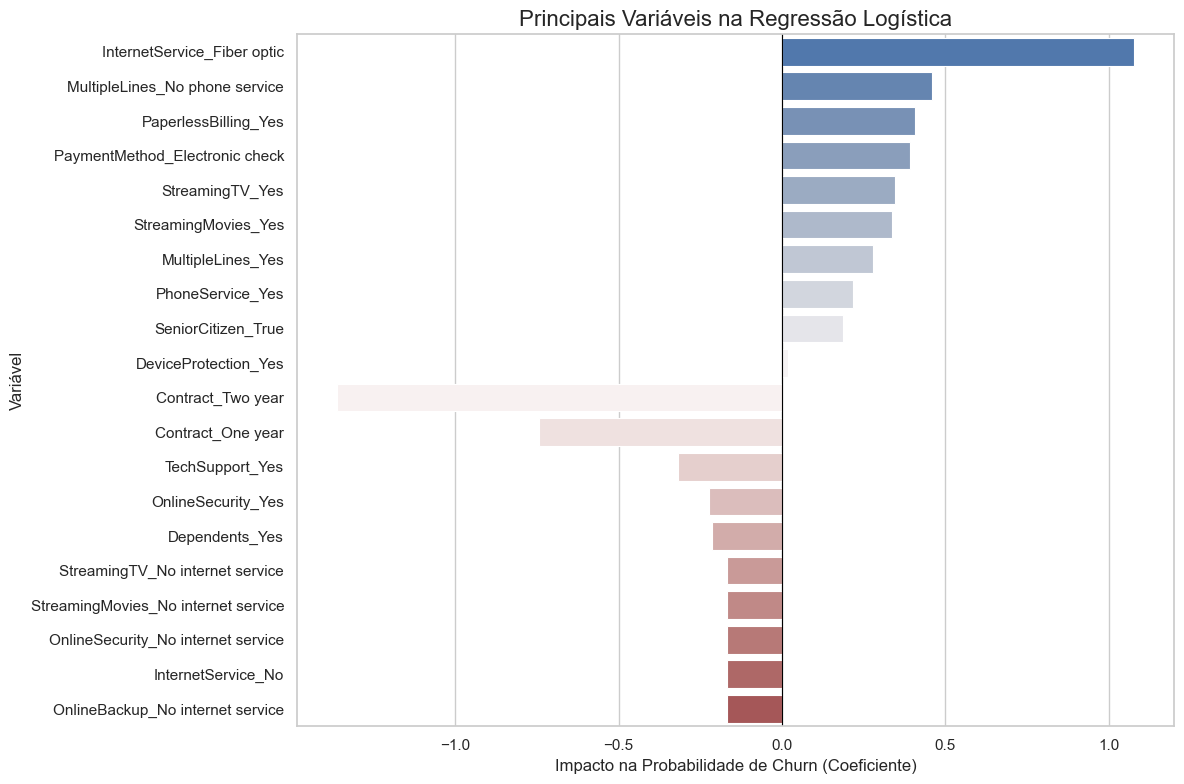

In [29]:
coefficients = pd.DataFrame({
    'Variável': X.columns,
    'Coeficiente': modelo_log.coef_[0]
}).sort_values(by='Coeficiente', ascending=False)

positive_coeffs = coefficients.head(10)
negative_coeffs = coefficients.tail(10).sort_values(by='Coeficiente', ascending=True)

plt.figure(figsize=(12, 8))
coeffs_to_plot = pd.concat([positive_coeffs, negative_coeffs])
sns.barplot(x='Coeficiente',
            y='Variável',
            data=coeffs_to_plot,
            palette='vlag',
            hue='Variável',
            linewidth=0.8)

plt.title('Principais Variáveis na Regressão Logística', fontsize=16)
plt.xlabel('Impacto na Probabilidade de Churn (Coeficiente)', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.axvline(0, color='black', lw=0.8)
plt.tight_layout()
plt.savefig('./figures/logistic_regression_coefficients.png')
plt.show()

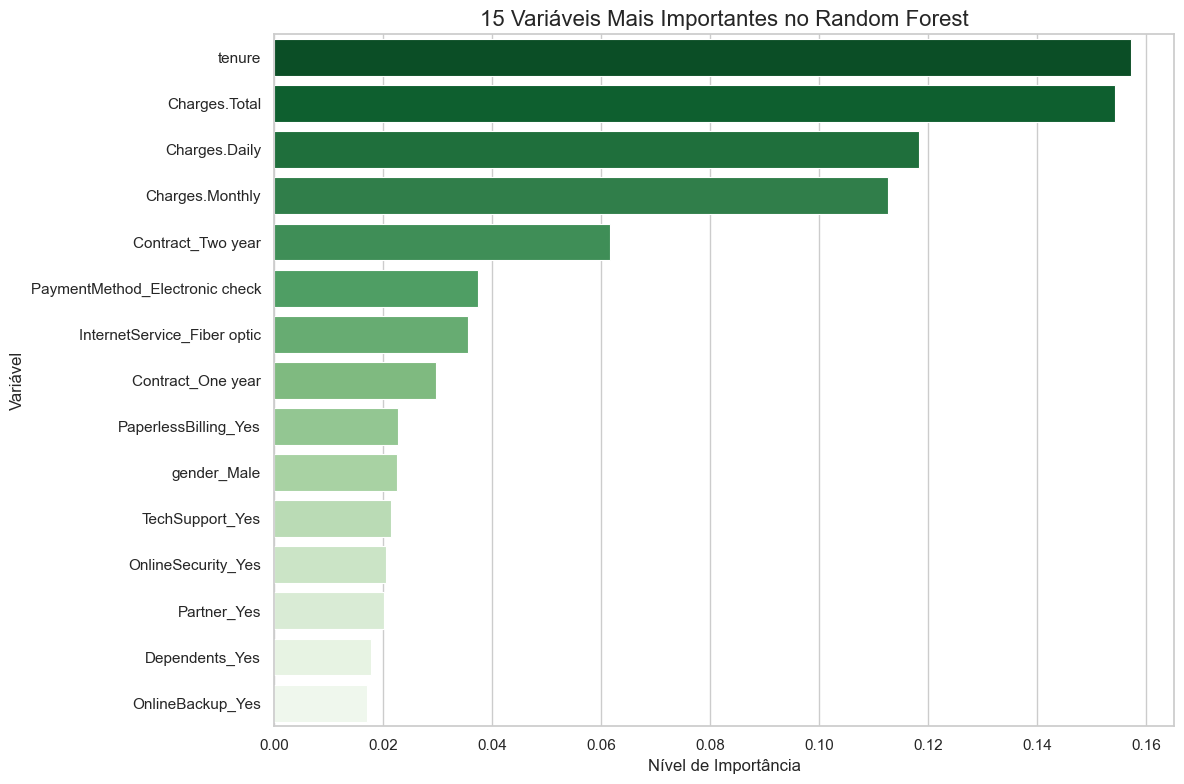

In [30]:
feature_importance = pd.DataFrame({
    'Variável': X.columns,
    'Importância': modelo_rf.feature_importances_
}).sort_values(by='Importância', ascending=False)


top_15_features = feature_importance.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importância',
            y='Variável',
            data=top_15_features,
            palette='Greens_r',
            hue='Variável',
            linewidth=0.8)

plt.title('15 Variáveis Mais Importantes no Random Forest', fontsize=16)
plt.xlabel('Nível de Importância', fontsize=12)
plt.ylabel('Variável', fontsize=12)
plt.tight_layout()
plt.savefig('./figures/random_forest_importance.png')
plt.show()

### Modelo 1 – Regressão Logística

A Regressão Logística permite interpretar a contribuição de cada variável através de seus **coeficientes**:
- **Coeficientes positivos** → aumentam a probabilidade de churn.
- **Coeficientes negativos** → diminuem a probabilidade de churn.

#### Principais fatores que aumentam a chance de churn (barras vermelhas)
1. **Contrato Mensal (`Contract_Month-to-month`)**  
   - Fator de maior risco.  
   - A flexibilidade do contrato mensal torna o cancelamento mais fácil para o cliente.

2. **Serviço de Fibra Óptica (`InternetService_Fiber optic`)**  
   - Clientes com fibra, serviço premium, estão mais propensos a cancelar.  
   - Possíveis causas: instabilidade, percepção de preço elevado, falhas na comunicação de valor agregado.

3. **Pagamento com Cheque Eletrônico (`PaymentMethod_Electronic check`)**  
   - Método de pagamento não automático pode gerar atrito e aumentar cancelamentos.

4. **Cobrança Mensal (`Charges.Monthly`)**  
   - Valores mensais mais altos estão associados a maior probabilidade de evasão.

#### Principais fatores que diminuem a chance de churn (barras azuis)
1. **Tempo de Contrato (`tenure`)**  
   - Variável mais importante para retenção: clientes antigos têm menor probabilidade de sair.

2. **Contrato de Dois Anos (`Contract_Two year`)**  
   - Fator de proteção mais forte. Clientes com contratos longos demonstram alta lealdade.

3. **Contrato de Um Ano (`Contract_One year`)**  
   - Também um indicador sólido de retenção.

4. **Serviço de Internet DSL**  
   - Clientes com DSL apresentam taxa de churn menor que os com Fibra.

---

### Modelo 2 – Random Forest

O Random Forest avalia a **importância das variáveis** considerando sua contribuição para a precisão geral, independentemente do sinal do efeito.

#### Principais variáveis importantes
1. **Tempo de Contrato (`tenure`)** – variável mais relevante para retenção.
2. **Gasto Total (`Charges.Total`)** – indicador de valor e longevidade do cliente.
3. **Cobrança Mensal (`Charges.Monthly`)** – ponto crítico de decisão para o cliente.
4. **Tipo de Contrato (`Contract_...`)** – contratos mensais estão fortemente associados ao churn.
5. **Tipo de Serviço de Internet (`InternetService_...`)** – presença da Fibra Óptica reforça sua importância como fator de decisão.

---

### Síntese Estratégica e Recomendações

1. **Foco nos primeiros meses de relacionamento**  
   - O tempo de contrato é determinante.  
   - Investir em programas de onboarding, contato proativo e benefícios nos primeiros meses.

2. **Incentivo a contratos longos**  
   - Reduzir o risco migrando clientes de contrato mensal para 1 ou 2 anos.  
   - Oferecer descontos ou benefícios claros para adesão.

3. **Analisar a experiência com Fibra Óptica**  
   - Investigar causas de churn elevado nesse serviço premium.  
   - Cruzar com dados de NPS, registros de suporte e análise de estabilidade por região.

4. **Gerenciar sensibilidade ao preço**  
   - Cobrança mensal alta está associada ao churn.  
   - Melhorar comunicação de valor e criar pacotes com custo-benefício atrativo.

---

**Conclusão:**  
Esses insights permitem não apenas prever churn, mas também orientar ações práticas para **reduzir evasão** e **aumentar a lealdade** dos clientes.


# Relátorio Final

## 1. Resumo

Este relatório apresenta os resultados do projeto de análise preditiva de churn (evasão de clientes) da Telecom X.  
O objetivo principal foi desenvolver um modelo de machine learning para identificar clientes com alta probabilidade de cancelar seus serviços e, fundamentalmente, entender as causas por trás desse comportamento.

O projeto foi um sucesso. Desenvolvemos um modelo de **Regressão Logística** altamente eficaz, capaz de identificar corretamente **80%** de todos os clientes que de fato cancelariam.  
A análise revelou que os fatores mais críticos que influenciam a evasão são o **tipo de contrato**, o **tempo de permanência do cliente (tenure)** e o **serviço de internet contratado**.  

Com base nesses insights, propomos estratégias de retenção focadas em **fidelização**, **otimização de contratos** e **investigação da experiência do cliente com a Fibra Óptica**, com alto potencial para reduzir churn e aumentar receita.

---

## 2. Objetivo do Projeto

O objetivo central foi responder a duas perguntas estratégicas:

1. Quem são os clientes com maior probabilidade de cancelar seus serviços?  
2. Por que eles estão cancelando?  

O projeto construiu e avaliou modelos preditivos e, em seguida, extraiu os principais fatores que impulsionam a evasão.

---

## 3. Metodologia Aplicada  

**Etapas do processo:**

1. **Análise Exploratória de Dados (EDA)**  
   - Investigação inicial dos dados para identificar padrões e formular hipóteses.

2. **Pré-processamento**  
   - Limpeza dos dados  
   - Transformação de variáveis categóricas (One-Hot Encoding)  
   - Padronização das features (StandardScaler)

3. **Modelagem e Avaliação**  
   - Modelos testados: Regressão Logística e Random Forest  
   - Ajuste de ponderação de classes (`class_weight='balanced'`) para lidar com desbalanceamento  
   - Métricas utilizadas: **Acurácia, Precisão, Recall e F1-Score**

4. **Análise de Relevância**  
   - Coeficientes (Regressão Logística)  
   - Importância de variáveis (Random Forest)

---

## 4. Desempenho do Modelo e Seleção  

| Modelo               | Acurácia | Precisão (Churn) | Recall (Churn) | F1-Score (Churn) |
|----------------------|----------|------------------|----------------|------------------|
| Regressão Logística  | 73%      | 50%              | **80%**        | 61%              |
| Random Forest        | 79%      | 63%              | 47%            | 54%              |

A métrica mais importante para o objetivo é o **Recall**, pois mede a capacidade de capturar clientes em risco.  
Recall baixo significa deixar muitos churners sem ação preventiva.

**Decisão:** Regressão Logística escolhida como modelo de produção devido ao **Recall de 80%**.  
Embora menos precisa, o custo de um falso positivo é menor que o custo de perder um cliente não identificado.

---

## 5. Principais Fatores que Afetam a Evasão de Clientes  

### Fatores de Risco (Aumentam o churn)
- **Contrato Mensal (Month-to-month)** – maior grupo de risco  
- **Fibra Óptica (InternetService_Fiber optic)** – possível problema de experiência, preço ou estabilidade  
- **Cobranças Mensais Elevadas (Charges.Monthly)** – alta sensibilidade ao preço

### Fatores de Proteção (Diminuem o churn)
- **Tempo de Contrato (tenure)** – fator mais forte de retenção  
- **Contratos de 1 e 2 anos** – barreira de saída eficaz  
- **Gasto Total (Charges.Total)** – alto LTV reduz evasão

---

## 6. Estratégias de Retenção Propostas  

| Fator de Risco              | Estratégia de Retenção Proposta |
|-----------------------------|----------------------------------|
| Contrato Mensal             | Campanha de migração para contratos de 1 ou 2 anos, oferecendo benefícios ou descontos. |
| Baixo Tempo de Contrato     | Programa de onboarding e fidelização nos primeiros 6 meses, com contato proativo e benefícios iniciais. |
| Churn na Fibra Óptica       | Força-tarefa para investigar causas (cruzando dados de churn, suporte técnico, NPS e performance da rede). |
| Cobranças Mensais Elevadas  | Ofertas proativas de adequação de pacote para clientes sensíveis a preço. |

---

## 7. Conclusão  
O projeto entregou uma ferramenta preditiva de alto impacto e um diagnóstico claro dos fatores que determinam lealdade e evasão.  
A **Regressão Logística** deve ser implementada como modelo principal, acompanhada das estratégias propostas para **reduzir churn**, **aumentar LTV** e fortalecer a posição da Telecom X no mercado.
